In [1]:
import mdtraj as md

from rocketshp import config

2025-02-04 04:22:16.578 | INFO     | rocketshp.config:<module>:13 - PROJ_ROOT path is: /mnt/home/ssledzieski/Projects/rocketshp


In [14]:
# load init.pdb in vmd and write out to fix charmm-gui errors
# In VMD:
# mol load pdb structure.pdb
# animate write pdb fixed.pdb

traj_file = config.PROCESSED_DATA_DIR / "3g5k_simulation" / "3g5k_sim.dcd"
top_file = config.PROCESSED_DATA_DIR / "3g5k_simulation" / "fixed.pdb"

In [13]:
traj = md.load_dcd(str(traj_file), top=str(top_file))

In [33]:
# subset the trajectory to only protein atoms
protein = traj.top.select("protein and name CA")
protein_traj = traj.atom_slice(protein)

# create a different trajectories for each of the four chains
chain_A = protein_traj.top.select("chainid 0")
chain_A_traj = protein_traj.atom_slice(chain_A)

chain_B = protein_traj.top.select("chainid 1")
chain_B_traj = protein_traj.atom_slice(chain_B)

chain_C = protein_traj.top.select("chainid 2")
chain_C_traj = protein_traj.atom_slice(chain_C)

chain_D = protein_traj.top.select("chainid 3")
chain_D_traj = protein_traj.atom_slice(chain_D)

chains = {"A": chain_A_traj, "B": chain_B_traj, "C": chain_C_traj, "D": chain_D_traj}

In [ ]:
# compute rmsf for all chains
rmsf = {}
for chain, traj in chains.items():
    rmsf[chain] = md.rmsf(traj, traj, 0)

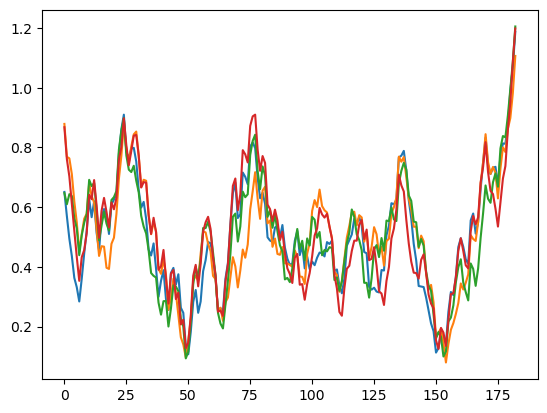

In [35]:
import matplotlib.pyplot as plt

for chain, rmsf_values in rmsf.items():
    plt.plot(rmsf_values, label=chain)
plt.show()